# Modelling

Will be doing mainly time series analysis, will try regression for fun

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)


from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [14]:
df = pd.read_csv('df.csv')

In [15]:
#Creating dataframe for feature variables and target variable
X = df[['CPI', 'PPI', 'CCI', '48_month_loan', '60_month_loan', 's&p']]
y = df['Battery Electric Vehicle (BEV) Count']

In [16]:
#Multiple linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.993828615899666 0.9933729856706219


In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

preds = lr.predict(X_test)

r2_score(y_test, preds)

0.9933729856706219

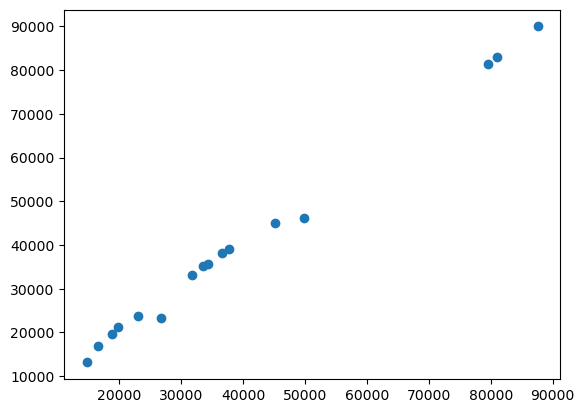

In [18]:
#Plotting y_test vs predicted values
plt.scatter(y_test, preds)

In [19]:
lr.coef_

array([ 1.85226620e+03, -4.15764478e+02,  6.13282418e+02,  4.49550930e+03,
       -3.76309258e+03, -3.48453511e+00])

In [20]:
lr.intercept_

-408951.14160962636

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_7111/117409033.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

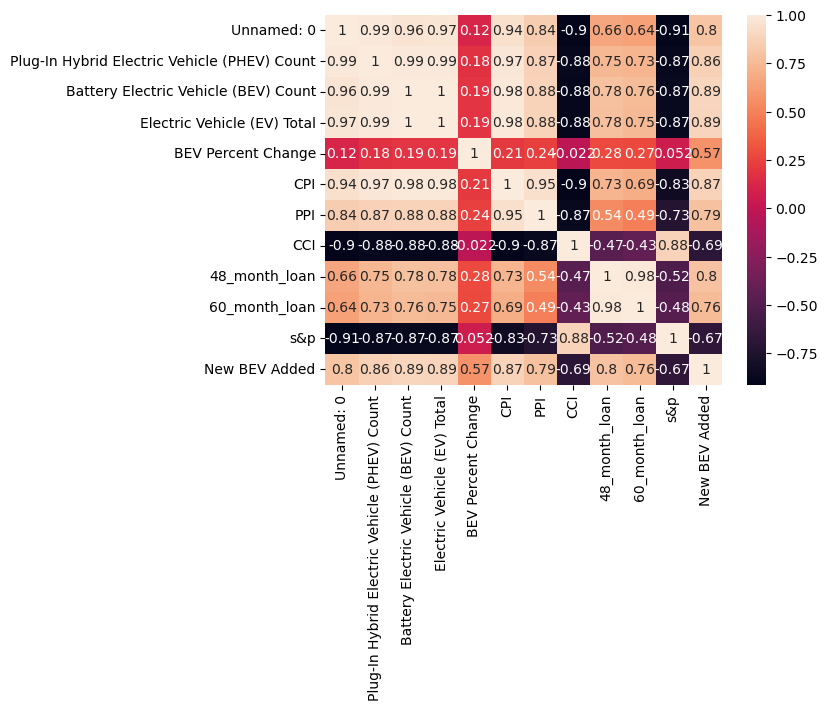

In [21]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [22]:
#Creating dataframe for feature variables and target variable using only highly correlated features to target
X = df[['CPI', 'PPI', '48_month_loan', '60_month_loan']]
y = df['Battery Electric Vehicle (BEV) Count']

#Multiple linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9927349476749716 0.9923711044710772


In [23]:
#Time Series Analysis
df.head()

,Unnamed: 0,Date,Plug-In Hybrid Electric Vehicle (PHEV) Count,Battery Electric Vehicle (BEV) Count,Electric Vehicle (EV) Total,BEV Percent Change,CPI,PPI,CCI,48_month_loan,60_month_loan,s&p,New BEV Added
0,0,2017-01-31,7687,14738,22425,NaN,242.839,190.7,101.3867,4.45,4.05,4409.10,NaN
1,1,2017-02-28,7888,15206,23094,3.175465,243.603,191.6,101.3742,4.52,4.21,4457.36,468.0
2,2,2017-03-31,8092,15596,23688,2.564777,243.801,191.5,101.3430,4.52,4.21,4508.08,390.0
3,3,2017-04-30,8286,16104,24390,3.257245,244.524,193.0,101.3027,4.52,4.21,4345.37,508.0
4,4,2017-05-31,8497,16569,25066,2.887481,244.733,192.8,101.2303,4.67,4.24,4146.17,465.0


In [24]:
df.tail()

,Unnamed: 0,Date,Plug-In Hybrid Electric Vehicle (PHEV) Count,Battery Electric Vehicle (BEV) Count,Electric Vehicle (EV) Total,BEV Percent Change,CPI,PPI,CCI,48_month_loan,60_month_loan,s&p,New BEV Added
75,75,2023-04-30,30883,101551,132434,3.421902,303.363,256.908,97.20781,7.46,7.48,2433.99,3360.0
76,76,2023-05-31,31651,105040,136691,3.435712,304.127,253.670,97.21225,7.59,7.81,2395.35,3489.0
77,77,2023-06-30,32497,108557,141054,3.348248,305.109,253.908,97.50813,7.59,7.81,2359.31,3517.0
78,78,2023-07-31,33081,112115,145196,3.277541,305.691,253.889,97.87399,7.59,7.81,2366.82,3558.0
79,79,2023-08-31,33864,117403,151267,4.716586,307.026,257.813,98.00307,8.30,7.88,2329.91,5288.0


In [25]:
#Going to create a new column to show the change month to month (first difference)
df['New BEV Added'] = df['Battery Electric Vehicle (BEV) Count'].diff()
df.head()

,Unnamed: 0,Date,Plug-In Hybrid Electric Vehicle (PHEV) Count,Battery Electric Vehicle (BEV) Count,Electric Vehicle (EV) Total,BEV Percent Change,CPI,PPI,CCI,48_month_loan,60_month_loan,s&p,New BEV Added
0,0,2017-01-31,7687,14738,22425,NaN,242.839,190.7,101.3867,4.45,4.05,4409.10,NaN
1,1,2017-02-28,7888,15206,23094,3.175465,243.603,191.6,101.3742,4.52,4.21,4457.36,468.0
2,2,2017-03-31,8092,15596,23688,2.564777,243.801,191.5,101.3430,4.52,4.21,4508.08,390.0
3,3,2017-04-30,8286,16104,24390,3.257245,244.524,193.0,101.3027,4.52,4.21,4345.37,508.0
4,4,2017-05-31,8497,16569,25066,2.887481,244.733,192.8,101.2303,4.67,4.24,4146.17,465.0


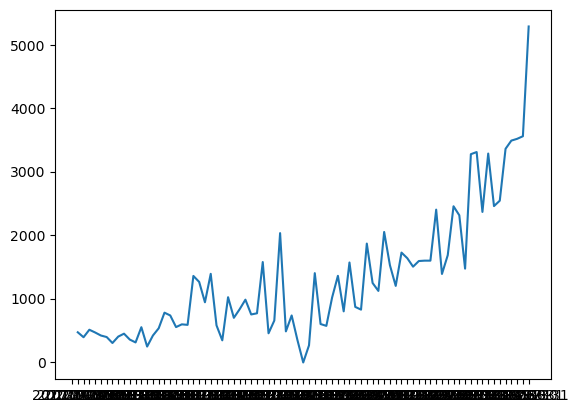

In [26]:
#Charting BEV's changes month over month
plt.plot(df['Date'], df['New BEV Added'])

In [27]:
ts = df[['Date', 'Battery Electric Vehicle (BEV) Count']]

In [28]:
ts.head()

,Date,Battery Electric Vehicle (BEV) Count
0,2017-01-31,14738
1,2017-02-28,15206
2,2017-03-31,15596
3,2017-04-30,16104
4,2017-05-31,16569


/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_7111/2178703542.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  roll_mean = ts.rolling(7).mean()
/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_7111/2178703542.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  roll_std = ts.rolling(7).std()


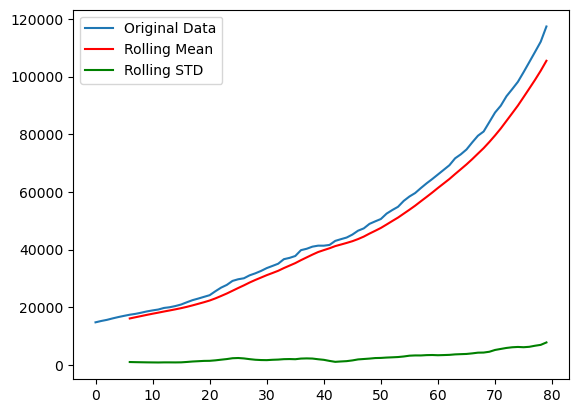

In [32]:
#Create graph with 7 month rolling avg
roll_mean = ts.rolling(7).mean()
roll_std = ts.rolling(7).std()

plt.plot(ts['Battery Electric Vehicle (BEV) Count'], label = 'Original Data')
plt.plot(roll_mean, color = 'red', label = 'Rolling Mean')
plt.plot(roll_std, color = 'green', label = 'Rolling STD')
plt.legend(loc = 'best')

In [31]:
#Time Series model evaluation
#https://builtin.com/data-science/time-series-python
from statsmodels.tsa.stattools import adfuller

adft = adfuller(ts['Battery Electric Vehicle (BEV) Count'],autolag="AIC")

output_ts = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_ts)

      Values                       Metric
0   2.291573              Test Statistics
1   0.998950                      p-value
2   3.000000             No. of lags used
3  76.000000  Number of observations used
4  -3.519481          critical value (1%)
5  -2.900395          critical value (5%)
6  -2.587498         critical value (10%)
